In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-17 20:05:28.475329


<h1>Dummy-muuttujien yhteenveto</h1>

Dummy-muuttujaksi (binäärinen muuttuja, dikotominen muuttuja) kutsutaan muuttujaa, joka saa arvokseen 1 tai 0 (joskus tämän sijasta käytetään tyhjää). 

    
Esimerkiksi kyselytutkimuksessa monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin kuin yhden, koodataan dummy-muuttujiksi: Jokainen kysymyksen vaihtoehto on muuttuja, joka saa arvokseen 1, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.
    

Tärkeää! Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysymystä ei kannata koodata dummy-muuttujiksi paitsi koneoppimisen malleja käytettäessä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Grafiikan tyylimääritys
plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Yhteenvetoon otettavien dummy-muuttujien nimet
monivalinta = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

In [5]:
# Valintojen lukumäärät count-funktiolla lukumäärän mukaan järjestettynä
df1 = df[monivalinta].sum().to_frame('f').sort_values('f', ascending=False)

# shape[0] antaa datan rivien lukumäärän eli vastaajien lukumäärän
n = df.shape[0]

# Prosentit
df1['% vastaajista'] = df1['f'] / n * 100

df1.index = ['Työterveyshuolto', 'Lomaosake', 'Kuntosali', 'Hieroja']

# Ulkoasun viimeistely
df1.style.format({'f':'{:.0f}', '% vastaajista':'{:.1f} %'})

,f,% vastaajista
Työterveyshuolto,47,57.3 %
Lomaosake,22,26.8 %
Kuntosali,20,24.4 %
Hieroja,9,11.0 %


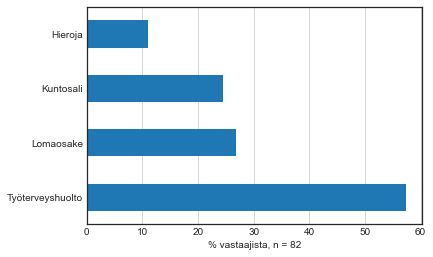

In [6]:
# Vaakapylväskaavio
df1['% vastaajista'].plot.barh()

# x-akselin otsikko
plt.xlabel(f'% vastaajista, n = {n}')

# Pystysuuntainen taustaviivoitus
plt.grid(axis = 'x')

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/